<a href="https://colab.research.google.com/github/hugol1212/Fundamentos/blob/main/Pr%C3%A1ctica4_1a_alumnos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica: Tensores y sus Aplicaciones
En esta práctica, trabajaremos con tensores desde su matricización hasta su aplicación práctica para la compresión de datos.

### Objetivos
1. Entender cómo vectorizar y matriciar un tensor.
2. Construir tensores a partir de tensores de rango 1 usando el producto externo.
3. Implementar el modelo PARAFAC para descomposición tensorial.

## 1. Vectorización y Matricización de Tensores
Un tensor puede ser representado como un vector o como una matriz dependiendo del modo en que se matriciza. Exploraremos diferentes modos y cómo realizar estas transformaciones.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#Apartado 1

# Crear un tensor de ejemplo donde cada "capa" tiene el mismo valor
# Tensor de tamaño I x J x K = 3 x 2 x 2
# Tensor de tamaño I x J x K = 3 x 2 x 2
tensor = np.array([
    np.ones((2, 2)) * 1,
    np.ones((2, 2)) * 2,
    np.ones((2, 2)) * 3
])


print("Tensor original:")
print(tensor)
print("Dimensiones del tensor:", tensor.shape)


Tensor original:
[[[1. 1.]
  [1. 1.]]

 [[2. 2.]
  [2. 2.]]

 [[3. 3.]
  [3. 3.]]]
Dimensiones del tensor: (3, 2, 2)



Matricización modo-1:
[[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]

Matricización modo-2:
[[1. 1. 2. 2. 3. 3.]
 [1. 1. 2. 2. 3. 3.]]

Matricización modo-3:
[[1. 1. 2. 2. 3. 3.]
 [1. 1. 2. 2. 3. 3.]]


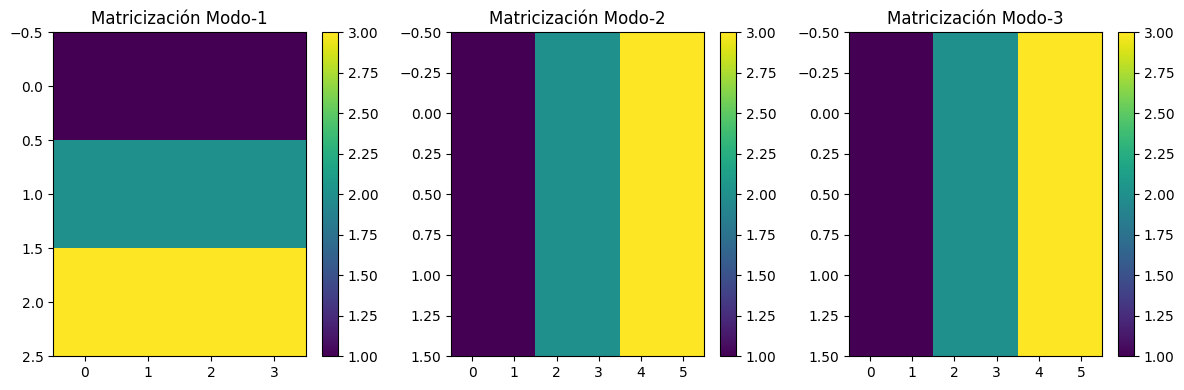


Dimensiones:
Modo-1: (3, 4)  -> I x (J*K)
Modo-2: (2, 6)  -> J x (I*K)
Modo-3: (2, 6)  -> K x (I*J)


In [12]:
#Apartado 2
# Matricización modo-1    I x (J*K)
mode1 = tensor.reshape(tensor.shape[0], -1)
print("\nMatricización modo-1:")
print(mode1)

# Matricización modo-2    J x (I*K)
mode2 = np.moveaxis(tensor, 1, 0).reshape(tensor.shape[1], -1)
print("\nMatricización modo-2:")
print(mode2)

# Matricización modo-3    K x (I*J)
mode3 = np.moveaxis(tensor, 2, 0).reshape(tensor.shape[2], -1)
print("\nMatricización modo-3:")
print(mode3)

# Visualización usando imshow
plt.figure(figsize=(12, 4))

# Mostrar modo-1
plt.subplot(1, 3, 1)
plt.imshow(mode1, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Matricización Modo-1")

# Mostrar modo-2
plt.subplot(1, 3, 2)
plt.imshow(mode2, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Matricización Modo-2")

# Mostrar modo-3
plt.subplot(1, 3, 3)
plt.imshow(mode3, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Matricización Modo-3")

plt.tight_layout()
plt.show()

print("\nDimensiones:")
print("Modo-1:", mode1.shape, " -> I x (J*K)")
print("Modo-2:", mode2.shape, " -> J x (I*K)")
print("Modo-3:", mode3.shape, " -> K x (I*J)")



Vectorización del tensor:
[1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3.]
Dimensión del vector: (12,)


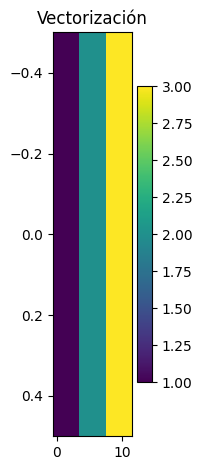

In [13]:
#Apartado 3
# Vectorización del tensor (aplanamiento total)
vectorized = tensor.reshape(-1)   # equivalente: tensor.flatten() o tensor.ravel()
print("\nVectorización del tensor:")
print(vectorized)
print("Dimensión del vector:", vectorized.shape)

# Mostrar vectorización como matriz (1 fila)
plt.subplot(1, 4, 4)
plt.imshow(vectorized.reshape(1, -1), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Vectorización")

plt.tight_layout()
plt.show()


Tensor original:
[[[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]


 [[[2. 2.]
   [2. 2.]]

  [[2. 2.]
   [2. 2.]]]


 [[[3. 3.]
   [3. 3.]]

  [[3. 3.]
   [3. 3.]]]]
Dimensiones del tensor: (3, 2, 2, 2)

Matricización modo-1:
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3.]]

Matricización modo-2:
[[1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3.]
 [1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3.]]

Matricización modo-3:
[[1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3.]
 [1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3.]]

Matricización modo-4:
[[1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3.]
 [1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3.]]


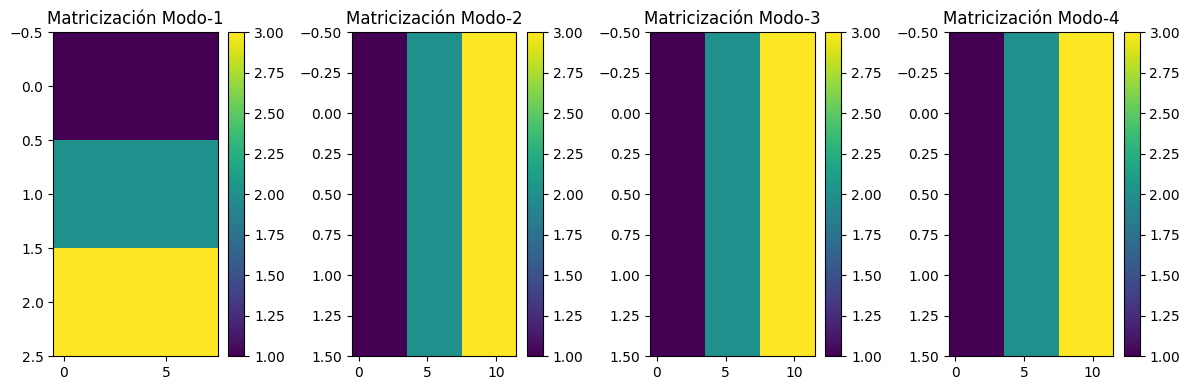


Dimensiones:
Modo-1: (3, 8)  -> I x (J*K)
Modo-2: (2, 12)  -> J x (I*K)
Modo-3: (2, 12)  -> K x (I*J)

Vectorización del tensor:
[1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3.]
Dimensión del vector: (24,)


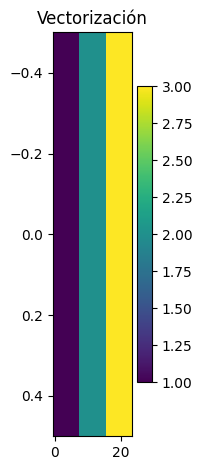

In [17]:
#Apartado 4

import numpy as np
import matplotlib.pyplot as plt
#Apartado 1 (solo tenemos que añadir la capa 4)

# Crear un tensor de ejemplo donde cada "capa" tiene el mismo valor
##########añadir una columna de doses
tensor = np.array([
    np.ones((2,2,2))*1,
    np.ones((2,2,2))*2,
    np.ones((2,2,2))*3
])

print("Tensor original:")
print(tensor)
print("Dimensiones del tensor:", tensor.shape)

#Apartado 2
# Matricización modo-1    I x (J*K)
mode1 = tensor.reshape(tensor.shape[0], -1)
print("\nMatricización modo-1:")
print(mode1)

# Matricización modo-2    J x (I*K)
mode2 = np.moveaxis(tensor, 1, 0).reshape(tensor.shape[1], -1)
print("\nMatricización modo-2:")
print(mode2)

# Matricización modo-3    K x (I*J)
mode3 = np.moveaxis(tensor, 2, 0).reshape(tensor.shape[2], -1)
print("\nMatricización modo-3:")
print(mode3)

# Matricización modo-4    K x (I*J)   ####añadido
mode4 = np.moveaxis(tensor, 3, 0).reshape(tensor.shape[3], -1)
print("\nMatricización modo-4:")
print(mode4)

# Visualización usando imshow
plt.figure(figsize=(12, 4))

#########cambiar 1.3.1 por 1.4.1
# Mostrar modo-1
plt.subplot(1, 4, 1)
plt.imshow(mode1, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Matricización Modo-1")

# Mostrar modo-2
plt.subplot(1, 4, 2)
plt.imshow(mode2, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Matricización Modo-2")

# Mostrar modo-3
plt.subplot(1, 4, 3)
plt.imshow(mode3, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Matricización Modo-3")

#####añadido
# Mostrar modo-4
plt.subplot(1, 4, 4)
plt.imshow(mode4, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Matricización Modo-4")

plt.tight_layout()
plt.show()

print("\nDimensiones:")
print("Modo-1:", mode1.shape, " -> I x (J*K)")
print("Modo-2:", mode2.shape, " -> J x (I*K)")
print("Modo-3:", mode3.shape, " -> K x (I*J)")

#Apartado 3
# Vectorización del tensor (aplanamiento total)
vectorized = tensor.reshape(-1)   # equivalente: tensor.flatten() o tensor.ravel()
print("\nVectorización del tensor:")
print(vectorized)
print("Dimensión del vector:", vectorized.shape)

# Mostrar vectorización como matriz (1 fila)
plt.subplot(1, 4, 4)
plt.imshow(vectorized.reshape(1, -1), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Vectorización")

plt.tight_layout()
plt.show()




## 2. Construcción de Tensores a partir de Tensores de Rango 1
Un tensor de rango 1 se puede construir mediante el producto externo de vectores.

In [22]:
# Producto externo para construir un tensor con valores enteros
v1 = np.array([1, 2, 3])          # Vector de tamaño 3
v2 = np.array([1, 2, 3, 4])       # Vector de tamaño 4
v3 = np.array([1, 2, 3, 4, 5])    # Vector de tamaño 5

# Producto externo (tensor de rango 1)
tensor_outer = np.einsum('i,j,k->ijk', v1, v2, v3)

print("\nTensor construido mediante producto externo:")
print(tensor_outer)
print("Dimensiones del tensor:", tensor_outer.shape)



Tensor construido mediante producto externo:
[[[ 1  2  3  4  5]
  [ 2  4  6  8 10]
  [ 3  6  9 12 15]
  [ 4  8 12 16 20]]

 [[ 2  4  6  8 10]
  [ 4  8 12 16 20]
  [ 6 12 18 24 30]
  [ 8 16 24 32 40]]

 [[ 3  6  9 12 15]
  [ 6 12 18 24 30]
  [ 9 18 27 36 45]
  [12 24 36 48 60]]]
Dimensiones del tensor: (3, 4, 5)
